## Importing libraries,data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv(r'scores_data.csv')

In [18]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


> column names need to be striped

In [9]:
df.columns = ['Batch', 'User_ID', 'Score']

In [13]:
df.isna().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

In [19]:
df['Batch'].value_counts()

AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: Batch, dtype: int64

<AxesSubplot:>

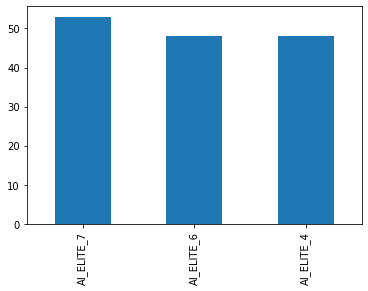

In [16]:
df['Batch'].value_counts().plot(kind = 'bar')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [21]:
df.tail()

,Batch,User_ID,Score
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7
148,AI_ELITE_4,uid_1,2 / 7


### The total score is 7 and out of 7 the score for individual is given

In [24]:
df['Score'] = df['Score'].apply(lambda x: x[0])

In [28]:
df['Score'] = df['Score'].astype('int')

### We do not need User_id

In [34]:
df.drop('User_ID',axis = 1,inplace = True)

In [43]:
df.groupby(['Batch']).mean().sort_values(by = ['Score'], ascending = False)

,Score
Batch,
AI_ELITE_7,5.056604
AI_ELITE_6,4.229167
AI_ELITE_4,3.791667


<AxesSubplot:xlabel='Batch'>

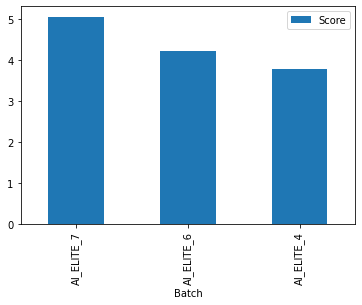

In [44]:
df.groupby(['Batch']).mean().sort_values(by = ['Score'], ascending = False).plot(kind = 'bar')

### We can observe that AI_ELITE_7 batch is having the highest average score.  
lets observe there distribution seperately

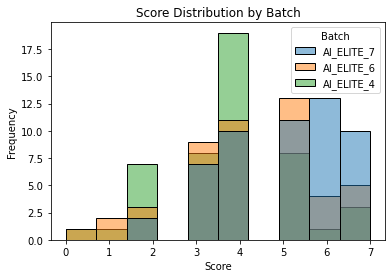

In [48]:
sns.histplot(data=df, x='Score', hue='Batch', kde=False)

plt.title('Score Distribution by Batch')
plt.xlabel('Score')
plt.ylabel('Frequency')

plt.show()

###  create separate histogram plots for each batch using Seaborn


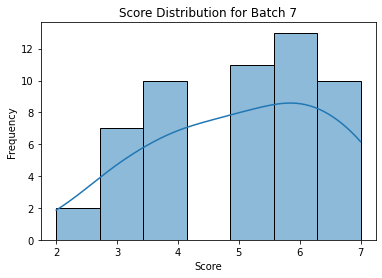

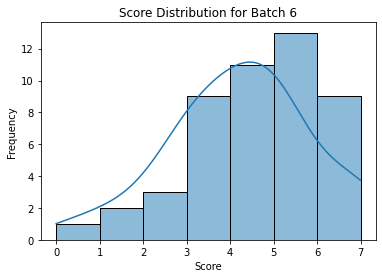

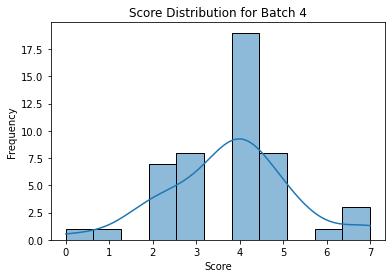

In [54]:

sns.histplot(data=df[df['Batch'] == 'AI_ELITE_7'], x='Score',kde = True)
plt.title('Score Distribution for Batch 7')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=df[df['Batch'] == 'AI_ELITE_6'], x='Score',kde = True)
plt.title('Score Distribution for Batch 6')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data=df[df['Batch'] == 'AI_ELITE_4'], x='Score',kde = True)
plt.title('Score Distribution for Batch 4')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [57]:
def map_to_category(score):
    if score <= 3:
        return 'Low'
    elif score <= 5:
        return 'Medium'
    else:
        return 'High'
df['category'] = df['Score'].apply(map_to_category)

In [64]:
df.groupby(['Batch', 'category']).size().reset_index(name='count')


,Batch,category,count
0,AI_ELITE_4,High,4
1,AI_ELITE_4,Low,17
2,AI_ELITE_4,Medium,27
3,AI_ELITE_6,High,9
4,AI_ELITE_6,Low,15
5,AI_ELITE_6,Medium,24
6,AI_ELITE_7,High,23
7,AI_ELITE_7,Low,9
8,AI_ELITE_7,Medium,21


### From Above Analysis We can Come to a conclusion that :-
AI_ELITE_7 is have high average because most of its members are **performing good**,High members are **performing Medium**.  

AI_ELITE_6 is having the high number of **Top Scorers** also **low performers** 

AI_ELITE_4 is having least number of **Top performers**  and also least number of **low performers** but the **medium performers** are high in number.

# <span style="color:red">Therefore AI_ELITE_7 BATCH IS BEST PERFORMER</span>
